In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

import plotly.express as px
from pmdarima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
df_renewable_power_plants = pd.read_csv("renewable_power_plants_DE_filtered_2019.csv")
df_renewable_power_plants.columns

/tmp/ipykernel_56738/279531070.py:1: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_renewable_power_plants = pd.read_csv("renewable_power_plants_DE_filtered_2019.csv")


Index(['electrical_capacity', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'technology', 'data_source', 'nuts_1_region',
       'nuts_2_region', 'nuts_3_region', 'lon', 'lat', 'municipality',
       'municipality_code', 'postcode', 'address', 'federal_state',
       'commissioning_date', 'decommissioning_date', 'voltage_level', 'eeg_id',
       'dso', 'dso_id', 'tso'],
      dtype='object')

In [117]:
df_renewable_power_plants.head()

,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,...,postcode,address,federal_state,commissioning_date,decommissioning_date,voltage_level,eeg_id,dso,dso_id,tso
0,0.08694,Renewable energy,Solar,NaN,Photovoltaics,BNetzA_PV,DE2,DE26,DE268,10.332874,...,97346.0,Dr.-Ruppert-Schneider-Straße 5,Bayern,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00600,Renewable energy,Solar,NaN,Photovoltaics,50Hertz,DED,DED4,DED43,13.043342,...,4736.0,NaN,Sachsen,2019-01-01,NaN,low voltage,NaN,Mitteldeutsche Netzgesellschaft Strom mbH,10001645.0,50Hertz
2,0.00747,Renewable energy,Solar,NaN,Photovoltaics,BNetzA_PV,DE2,DE23,DE235,12.391779,...,93194.0,NaN,Bayern,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00972,Renewable energy,Solar,NaN,Photovoltaics,BNetzA_PV,DE1,DE11,DE11B,9.574454,...,97953.0,NaN,Baden-Württemberg,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00999,Renewable energy,Solar,NaN,Photovoltaics,BNetzA_PV,DE1,DE12,DE127,9.480866,...,74736.0,NaN,Baden-Württemberg,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df_renewable_power_plants.columns

Index(['electrical_capacity', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'technology', 'data_source', 'nuts_1_region',
       'nuts_2_region', 'nuts_3_region', 'lon', 'lat', 'municipality',
       'municipality_code', 'postcode', 'address', 'federal_state',
       'commissioning_date', 'decommissioning_date', 'voltage_level', 'eeg_id',
       'dso', 'dso_id', 'tso'],
      dtype='object')

In [119]:
df_renewable_power_plants.dtypes

electrical_capacity      float64
energy_source_level_1     object
energy_source_level_2     object
energy_source_level_3     object
technology                object
data_source               object
nuts_1_region             object
nuts_2_region             object
nuts_3_region             object
lon                      float64
lat                      float64
municipality              object
municipality_code        float64
postcode                 float64
address                   object
federal_state             object
commissioning_date        object
decommissioning_date     float64
voltage_level             object
eeg_id                    object
dso                       object
dso_id                   float64
tso                       object
dtype: object

['Stuttgart, Stadtkreis' 'BÃ¶blingen' 'Esslingen' 'GÃ¶ppingen'
 'Ludwigsburg' 'Rems-Murr-Kreis' 'Heilbronn, Stadtkreis'
 'Heilbronn, Landkreis' 'Hohenlohekreis' 'SchwÃ¤bisch Hall'
 'Main-Tauber-Kreis' 'Heidenheim' 'Ostalbkreis' 'Baden-Baden, Stadtkreis'
 'Karlsruhe, Stadtkreis' 'Karlsruhe, Landkreis' 'Rastatt'
 'Heidelberg, Stadtkreis' 'Mannheim, Stadtkreis' 'Neckar-Odenwald-Kreis'
 'Rhein-Neckar-Kreis' 'Pforzheim, Stadtkreis' 'Calw' 'Enzkreis'
 'Freudenstadt' 'Freiburg im Breisgau, Stadtkreis'
 'Breisgau-Hochschwarzwald' 'Emmendingen' 'Ortenaukreis' 'Rottweil'
 'Schwarzwald-Baar-Kreis' 'Tuttlingen' 'Konstanz' 'LÃ¶rrach' 'Waldshut'
 'Reutlingen' 'TÃ¼bingen, Landkreis' 'Zollernalbkreis' 'Ulm, Stadtkreis'
 'Alb-Donau-Kreis' 'Biberach' 'Bodenseekreis' 'Ravensburg' 'Sigmaringen'
 'Ingolstadt, Kreisfreie Stadt' 'MÃ¼nchen, Kreisfreie Stadt'
 'Rosenheim, Kreisfreie Stadt' 'AltÃ¶tting' 'Berchtesgadener Land'
 'Bad TÃ¶lz-Wolfratshausen' 'Dachau' 'Ebersberg' 'EichstÃ¤tt' 'Erding'
 'Freising' 'FÃ

/tmp/ipykernel_56738/510360557.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=14)


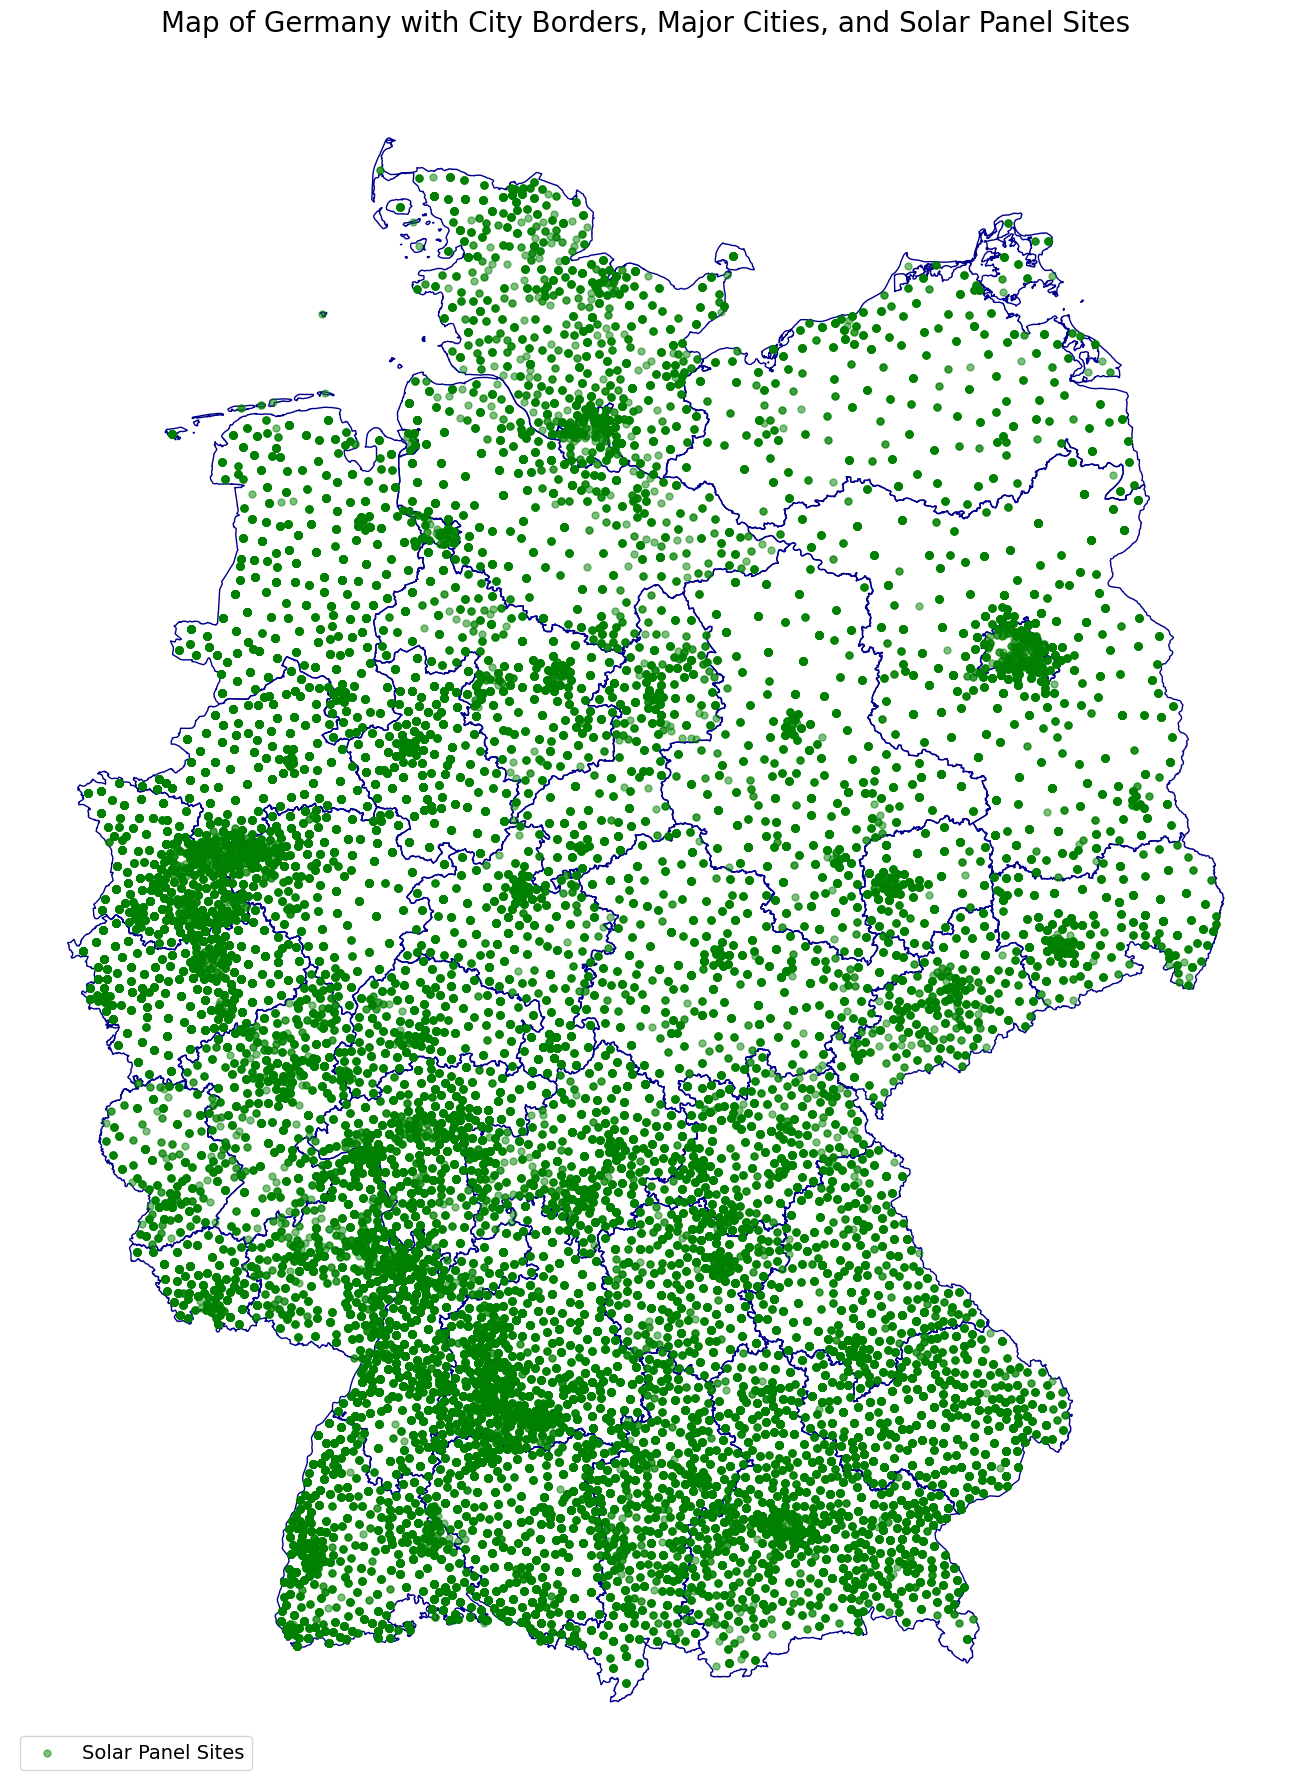

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

# Step 1: Load the world shapefile
path_to_country_shapefile = "geoBoundaries-DEU-ADM3-all/geoBoundaries-DEU-ADM3.shp"
world = gpd.read_file(path_to_country_shapefile)

# Verify the unique values in the shapeName column
print(world['shapeName'].unique())

# Filter for Germany using the shapeName column
germany = world[world['shapeName'] == 'Germany']

# Step 2: Load city/district boundaries
path_to_cities_shapefile = "geoBoundaries-DEU-ADM2-all/geoBoundaries-DEU-ADM2.shp"
cities = gpd.read_file(path_to_cities_shapefile)

# Ensure CRS matches
cities = cities.to_crs(germany.crs)

# Step 3: Load your dataset with latitude and longitude
data = pd.DataFrame({
    'latitude': [52.52, 48.14, 50.11],  # Example latitudes (Berlin, Munich, Frankfurt)
    'longitude': [13.405, 11.58, 8.682],  # Example longitudes
    'name': ['Berlin', 'Munich', 'Frankfurt']
})

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)
geo_data.set_crs(epsg=4326, inplace=True)  # WGS84
geo_data = geo_data.to_crs(germany.crs)

# Step 4: Load the solar panel dataset
# Assuming df_renewable_power_plants is your dataset
# Convert the DataFrame into a GeoDataFrame using the 'lon' and 'lat' columns
solar_geometry = [Point(xy) for xy in zip(df_renewable_power_plants['lon'], df_renewable_power_plants['lat'])]
solar_geo_data = gpd.GeoDataFrame(df_renewable_power_plants, geometry=solar_geometry)
solar_geo_data.set_crs(epsg=4326, inplace=True)  # WGS84
solar_geo_data = solar_geo_data.to_crs(germany.crs)

fig, ax = plt.subplots(figsize=(16, 18))

# Plot Germany boundary
if not germany.empty and 'geometry' in germany.columns:
    germany.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=2.5, alpha=0.7, label='Germany')
else:
    print("Germany GeoDataFrame is invalid or empty, cannot plot boundaries.")

# Plot city/district boundaries
if not cities.empty and 'geometry' in cities.columns:
    cities.plot(ax=ax, color='none', edgecolor='darkblue', linewidth=1, label='City Borders')
else:
    print("Cities GeoDataFrame is invalid or empty, cannot plot city borders.")


# Plot solar panel locations
if not solar_geo_data.empty:
    solar_geo_data.plot(ax=ax, color='green', alpha=0.5, markersize=25, label='Solar Panel Sites')
else:
    print("Solar Panel GeoDataFrame is empty, cannot plot solar panel sites.")

# Title and legend
plt.title("Map of Germany with City Borders, Major Cities, and Solar Panel Sites", fontsize=20, pad=20)
plt.legend(loc='lower left', fontsize=14)

# Customize axes
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [4]:
df_time_series = pd.read_csv("time_series_60min_singleindex_filtered.csv")

In [5]:
df_time_series.head()

,utc_timestamp,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172


In [125]:
df_time_series.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity',
       'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity',
       'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile'],
      dtype='object')

In [126]:
df_time_series.dtypes

utc_timestamp                            object
cet_cest_timestamp                       object
DE_load_actual_entsoe_transparency      float64
DE_load_forecast_entsoe_transparency    float64
DE_solar_capacity                       float64
DE_solar_generation_actual              float64
DE_solar_profile                        float64
DE_wind_capacity                        float64
DE_wind_generation_actual               float64
DE_wind_profile                         float64
DE_wind_offshore_capacity               float64
DE_wind_offshore_generation_actual      float64
DE_wind_offshore_profile                float64
DE_wind_onshore_capacity                float64
DE_wind_onshore_generation_actual       float64
DE_wind_onshore_profile                 float64
dtype: object

In [100]:
# Convert timestamp columns to datetime
df_time_series['utc_timestamp'] = pd.to_datetime(df_time_series['utc_timestamp'], errors='coerce')
if 'cet_cest_timestamp' in df_time_series.columns:
    df_time_series['cet_cest_timestamp'] = pd.to_datetime(df_time_series['cet_cest_timestamp'], errors='coerce')

# Display the first few rows of the dataset to confirm successful loading and parsing
df_time_series.head()

KeyError: 'utc_timestamp'

In [6]:
# Check for missing values in the dataset
missing_summary = df_time_series.isnull().sum()

# Display columns with missing values and their counts
missing_summary = missing_summary[missing_summary > 0]

# Display the summary to the user
missing_summary

DE_load_actual_entsoe_transparency         1
DE_load_forecast_entsoe_transparency      25
DE_solar_capacity                       6601
DE_solar_generation_actual               104
DE_solar_profile                        6705
DE_wind_capacity                        6601
DE_wind_generation_actual                 75
DE_wind_profile                         6676
DE_wind_offshore_capacity               6601
DE_wind_offshore_generation_actual        75
DE_wind_offshore_profile                6676
DE_wind_onshore_capacity                6601
DE_wind_onshore_generation_actual         73
DE_wind_onshore_profile                 6674
dtype: int64

In [7]:
# Handle missing values:
# For continuous data (load and energy generation), use forward-fill for imputation
df_time_series.fillna(method='ffill', inplace=True)

# For columns with significant missing data, impute with median values
columns_with_large_missing = [
    'DE_solar_capacity', 'DE_solar_profile', 'DE_wind_capacity',
    'DE_wind_profile', 'DE_wind_offshore_capacity', 'DE_wind_offshore_profile',
    'DE_wind_onshore_capacity', 'DE_wind_onshore_profile'
]
for col in columns_with_large_missing:
    if col in df_time_series.columns:
        df_time_series[col].fillna(df_time_series[col].median(), inplace=True)

# Verify missing values are resolved
missing_summary_after = df_time_series.isnull().sum()

# Display columns that still have missing values (if any)
missing_summary_after = missing_summary_after[missing_summary_after > 0]
missing_summary_after

/tmp/ipykernel_56738/1282072756.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_time_series.fillna(method='ffill', inplace=True)
/tmp/ipykernel_56738/1282072756.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_time_series[col].fillna(df_time_series[col].median(), inplace=True)
/tmp/ipykernel_56738/1282072756.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment usin

DE_load_actual_entsoe_transparency      1
DE_load_forecast_entsoe_transparency    1
DE_solar_generation_actual              8
DE_wind_generation_actual               1
DE_wind_offshore_generation_actual      1
DE_wind_onshore_generation_actual       1
dtype: int64

In [8]:
# Handle the remaining missing values using backward-fill
df_time_series.fillna(method='bfill', inplace=True)

# Verify again to ensure no missing values remain
missing_summary_final = df_time_series.isnull().sum()

# Display if any columns still have missing values
missing_summary_final = missing_summary_final[missing_summary_final > 0]
missing_summary_final

/tmp/ipykernel_56738/2053278426.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_time_series.fillna(method='bfill', inplace=True)


Series([], dtype: int64)

XGBoost RMSE: 1744.69


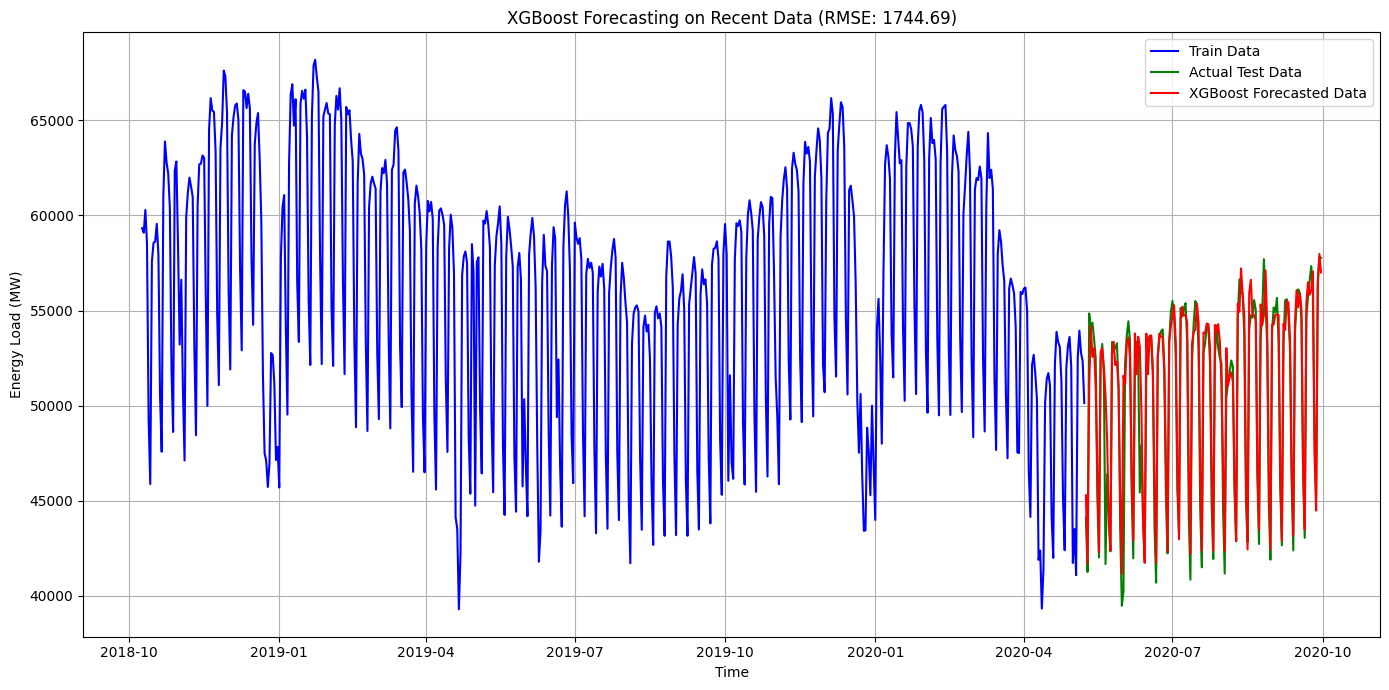

In [135]:
# Load dataset
df_time_series = pd.read_csv('time_series_60min_singleindex_filtered.csv')

target_column = 'DE_load_actual_entsoe_transparency'

if 'utc_timestamp' in df_time_series.columns:
    df_time_series['utc_timestamp'] = pd.to_datetime(df_time_series['utc_timestamp'])
    df_time_series.set_index('utc_timestamp', inplace=True)

# Downsample to daily averages
df_daily = df_time_series[target_column].resample('D').mean()

df_recent = df_daily[-730:]  # Last 2 years

# Feature engineering
df_recent = df_recent.to_frame()
df_recent['day_of_week'] = df_recent.index.dayofweek
df_recent['month'] = df_recent.index.month
df_recent['lag_1'] = df_recent[target_column].shift(1)
df_recent['lag_7'] = df_recent[target_column].shift(7)
df_recent.dropna(inplace=True)

# Train-test split
split_index_recent = int(len(df_recent) * 0.8)
train_data_recent = df_recent.iloc[:split_index_recent]
test_data_recent = df_recent.iloc[split_index_recent:]

X_train = train_data_recent.drop(columns=[target_column])
y_train = train_data_recent[target_column]
X_test = test_data_recent.drop(columns=[target_column])
y_test = test_data_recent[target_column]

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model_xgb.fit(X_train_scaled, y_train)

# Forecasting
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate XGBoost RMSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f'XGBoost RMSE: {rmse_xgb:.2f}')

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(train_data_recent.index, y_train, label='Train Data', color='blue')
plt.plot(test_data_recent.index, y_test, label='Actual Test Data', color='green')
plt.plot(test_data_recent.index, y_pred_xgb, label='XGBoost Forecasted Data', color='red')
plt.title(f'XGBoost Forecasting on Recent Data (RMSE: {rmse_xgb:.2f})')
plt.xlabel('Time')
plt.ylabel('Energy Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
df_solar_pv_price = pd.read_csv("solar-pv-prices-vs-cumulative-capacity/solar-pv-prices-vs-cumulative-capacity.csv")
df_solar_pv_price.head()

print(df_solar_pv_price.columns)
print(df_solar_pv_price.dtypes)

Index(['Entity', 'Code', 'Year', 'Solar photovoltaic module price',
       'Solar photovoltaic cumulative capacity'],
      dtype='object')
Entity                                     object
Code                                       object
Year                                        int64
Solar photovoltaic module price           float64
Solar photovoltaic cumulative capacity    float64
dtype: object


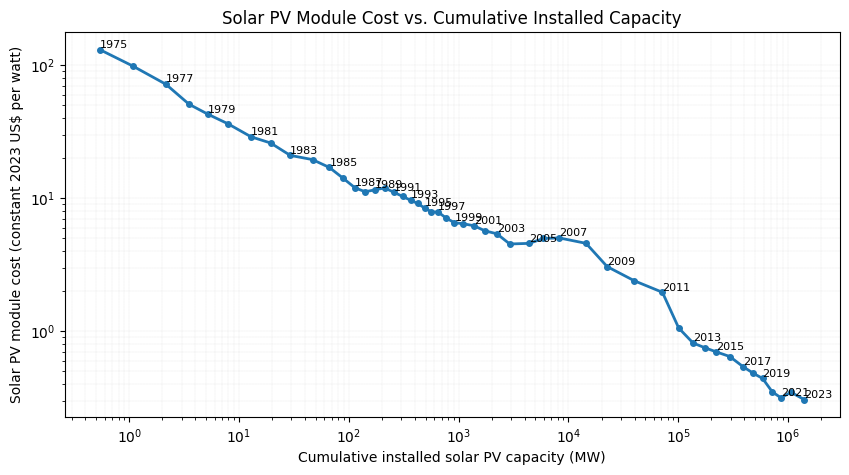

In [26]:
# Extract relevant data
years = df_solar_pv_price["Year"]
prices = df_solar_pv_price["Solar photovoltaic module price"]
capacity = df_solar_pv_price["Solar photovoltaic cumulative capacity"]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(capacity, prices, marker='o', linestyle='-', linewidth=2, markersize=4)

# Annotate with years
for i in range(0, len(years), 2):  # Annotate every 2nd year for clarity
    plt.text(capacity[i], prices[i], str(years[i]), fontsize=8, verticalalignment='bottom')

# Set log scales
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Cumulative installed solar PV capacity (MW)")
plt.ylabel("Solar PV module cost (constant 2023 US$ per watt)")
plt.title("Solar PV Module Cost vs. Cumulative Installed Capacity")

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.1)
plt.show()